<a href="https://colab.research.google.com/github/priaJuli/IR_Pilkada2017/blob/main/ImageProc_version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-image

from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
path = "drive/MyDrive/TUGAS IMAGE PROCESSING/Citra LUBANG JALAN/Citra/Citra Pelatihan/"

In [3]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [4]:
import joblib
from skimage.io import imread
from skimage.transform import resize
 
def resize_all(src, pklname, include, width=150, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir)
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

In [5]:
# modify to fit your system
data_path = fr'drive/MyDrive/TUGAS IMAGE PROCESSING/Citra LUBANG JALAN/Citra/Citra Pelatihan/'
os.listdir(data_path)

['Jalan Marka', 'Jalan Lubang', 'Jalan Baik']

In [6]:
base_name = 'jalan'
width = 80
 
include = {'Jalan Marka', 'Jalan Lubang', 'Jalan Baik'}
 
resize_all(src=data_path, pklname=base_name, width=width, include=include)


Jalan Marka
Jalan Lubang
Jalan Baik


In [7]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
print(data['label']) 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

['Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Ma

Counter({'Jalan Baik': 100, 'Jalan Lubang': 100, 'Jalan Marka': 100})

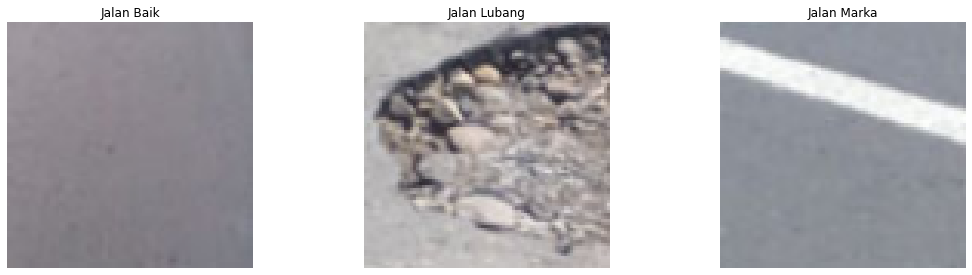

In [8]:
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [9]:
X_train = np.array(data['data'])
y_train = np.array(data['label'])

In [10]:
# GET TESTING

data_path_tesing = fr'drive/MyDrive/TUGAS IMAGE PROCESSING/Citra LUBANG JALAN/Citra/CItra Pengujian/'
os.listdir(data_path_tesing)

base_name_test = 'jalan'
width = 80
 
include = {'Jalan Marka', 'Jalan Lubang', 'Jalan Baik'}
 
resize_all(src=data_path_tesing, pklname=base_name_test, width=width, include=include)
 
data_testing = joblib.load(f'{base_name_test}_{width}x{width}px.pkl')
print(data_testing['label']) 
print('number of samples: ', len(data_testing['data']))
print('keys: ', list(data_testing.keys()))
print('description: ', data_testing['description'])
print('image shape: ', data_testing['data'][0].shape)
print('labels:', np.unique(data_testing['label']))
 
Counter(data_testing['label'])


Jalan Marka
Jalan Lubang
Jalan Baik
['Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Marka', 'Jalan Lubang', 'Jalan Lubang', 'Jalan Lubang', 'Jalan Lubang', 'Jalan Lubang', 'Jalan Lubang', 'Jalan Lubang', 'Jalan Lubang', 'Jalan Lubang', 'Jalan Lubang', 'Jalan Baik', 'Jalan Baik', 'Jalan Baik', 'Jalan Baik', 'Jalan Baik', 'Jalan Baik', 'Jalan Baik', 'Jalan Baik', 'Jalan Baik', 'Jalan Baik']
number of samples:  30
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80)animal images in rgb
image shape:  (80, 80, 3)
labels: ['Jalan Baik' 'Jalan Lubang' 'Jalan Marka']


Counter({'Jalan Baik': 10, 'Jalan Lubang': 10, 'Jalan Marka': 10})

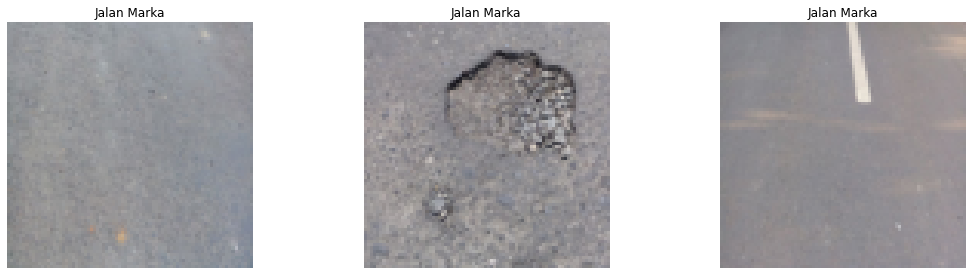

In [11]:
# use np.unique to get all unique values in the list of labels
labels_testing = np.unique(data_testing['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels_testing))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label_test in zip(axes, labels_testing):
    idx = data_testing['label'].index(label_test)
     
    ax.imshow(data_testing['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [12]:
X_test = np.array(data_testing['data'])
y_test = np.array(data_testing['label'])

# from sklearn.model_selection import train_test_split
 
# X_train, X_test, y_train, y_test = train_test_split(
#     X, 
#     y, 
#     test_size=0.1, 
#     shuffle=True,
#     random_state=42,
# )

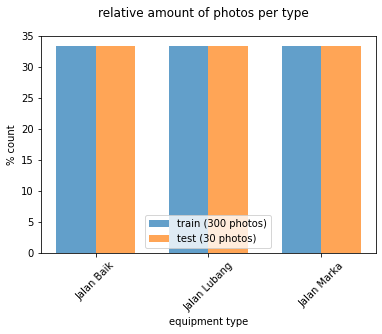

In [13]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

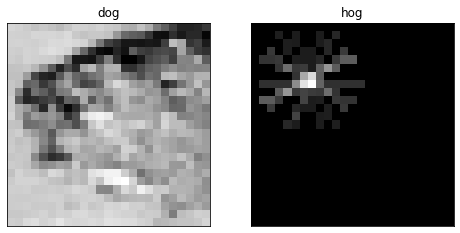

In [14]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale

path_sample = "drive/MyDrive/TUGAS IMAGE PROCESSING/Citra LUBANG JALAN/Citra/Citra Pelatihan/Jalan Lubang/1.jpg"
 
dog = imread(path_sample, as_gray=True)
# https://en.wikipedia.org/wiki/German_Shepherd#/media/File:Kim_at_14_weeks.jpg
 
# scale down the image to one third
dog = rescale(dog, 1/3, mode='reflect')
# calculate the hog and return a visual representation.
dog_hog, dog_hog_img = hog(
    dog, pixels_per_cell=(14,14), 
    cells_per_block=(2, 2), 
    orientations=9, 
    visualize=True, 
    block_norm='L2-Hys')
 
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]
 
ax[0].imshow(dog, cmap='gray')
ax[0].set_title('dog')
ax[1].imshow(dog_hog_img, cmap='gray')
ax[1].set_title('hog')
plt.show()

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])


In [16]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(3,3), 
    orientations=8, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
print(X_train.shape) 
# call fit_transform on each transform converting X_train step by step
X_train_gray = grayify.fit_transform(X_train)
print(X_train_gray.shape) 
X_train_hog = hogify.fit_transform(X_train_gray)
print(X_train_hog.shape) 
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

(300, 80, 80, 3)
(300, 80, 80)
(300, 648)
(300, 648)


In [17]:
sgd_clf = SGDClassifier(loss="perceptron", random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='perceptron',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)


In [19]:
y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:30])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True False  True  True]

Percentage correct:  93.33333333333333


In [20]:
import pandas as pd

In [21]:
# labels = ['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no',  'no', 'no', 'no']
# predictions = ['yes', 'yes', 'yes', 'yes', 'no',  'no',  'yes', 'no', 'no', 'no']
labels = y_test
predictions = y_pred

# put the data in a dataframe for pretty printing
df = pd.DataFrame(
    np.c_[labels, predictions], 
    columns=['true_label', 'prediction']
)
df

,true_label,prediction
0,Jalan Marka,Jalan Marka
1,Jalan Marka,Jalan Marka
2,Jalan Marka,Jalan Marka
3,Jalan Marka,Jalan Marka
4,Jalan Marka,Jalan Marka
5,Jalan Marka,Jalan Marka
6,Jalan Marka,Jalan Marka
7,Jalan Marka,Jalan Marka
8,Jalan Marka,Jalan Marka
9,Jalan Marka,Jalan Marka


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
 
label_names = ['Jalan Baik', 'Jalan Marka', 'Jalan Lubang']
cmx = confusion_matrix(labels, predictions, labels=label_names)
df = pd.DataFrame(cmx, columns=label_names, index=label_names)
df.columns.name = 'prediction'
df.index.name = 'label'
df

prediction,Jalan Baik,Jalan Marka,Jalan Lubang
label,,,
Jalan Baik,8,0,2
Jalan Marka,0,10,0
Jalan Lubang,0,0,10


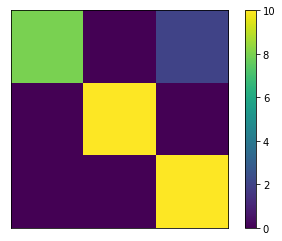

In [23]:
plt.imshow(cmx)
plt.xticks([])
plt.yticks([])
plt.colorbar();

In [24]:
cmx = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
cmx

              precision    recall  f1-score   support

  Jalan Baik       1.00      0.80      0.89        10
Jalan Lubang       0.83      1.00      0.91        10
 Jalan Marka       1.00      1.00      1.00        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



array([[ 8,  2,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])


 ['Jalan Baik', 'Jalan Lubang', 'Jalan Marka']


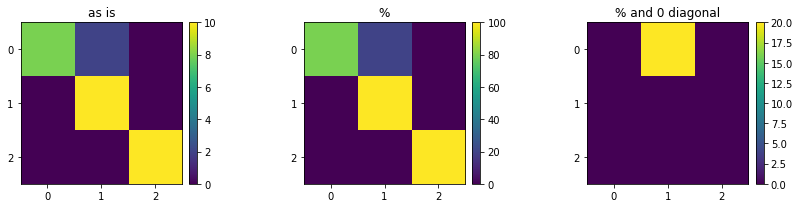

In [25]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
 
def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()
 
    np.fill_diagonal(cmx_zero_diag, 0)
 
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(len(cmx)+1)) for a in ax]
    [a.set_yticks(range(len(cmx)+1)) for a in ax]
         
    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')
 
    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1) 
                        for divider in dividers]
 
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()
     
plot_confusion_matrix(cmx)
 
# the types appear in this order
print('\n', sorted(np.unique(y_test)))

In [26]:
from sklearn.pipeline import Pipeline
from sklearn import svm
 
HOG_pipeline = Pipeline([
    ('grayify', RGB2GrayTransformer()),
    ('hogify', HogTransformer(
        pixels_per_cell=(14, 14), 
        cells_per_block=(3, 3), 
        orientations=8, 
        block_norm='L2-Hys')
    ),
    ('scalify', StandardScaler()),
    ('classify', SGDClassifier(loss="perceptron", random_state=42, max_iter=1000, tol=1e-3))
])
 
clf = HOG_pipeline.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Percentage correct: ', 100*np.sum(clf.predict(X_test) == y_test)/len(y_test))
print(classification_report(y_test, y_pred))


Percentage correct:  93.33333333333333
              precision    recall  f1-score   support

  Jalan Baik       1.00      0.80      0.89        10
Jalan Lubang       0.83      1.00      0.91        10
 Jalan Marka       1.00      1.00      1.00        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [27]:
from sklearn.model_selection import GridSearchCV
 
param_grid = [
    {
        'hogify__orientations': [8, 9],
        'hogify__cells_per_block': [(2, 2), (3, 3), (4, 4)],
        'hogify__pixels_per_cell': [(8, 8), (10, 10), (12, 12), (14, 14)]
    },
    {
        'hogify__orientations': [8],
         'hogify__cells_per_block': [(2,2), (3, 3), (4, 4)],
         'hogify__pixels_per_cell': [(8, 8), (10,10), (12, 12), (14, 14)],
         'classify': [
             SGDClassifier(loss="perceptron", random_state=42, max_iter=1000, tol=1e-3),
             SGDClassifier(loss="perceptron", random_state=42, max_iter=500, tol=1e-3),
             SGDClassifier(loss="perceptron", random_state=42, max_iter=200, tol=1e-3),
             svm.SVC(kernel='linear')
         ]
    }
]

In [28]:
grid_search = GridSearchCV(HOG_pipeline, 
                           param_grid, 
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1,
                           return_train_score=True)
 
grid_res = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  3.0min finished


In [29]:
# save the model to disk
joblib.dump(grid_res, 'hog_sgd_model.pkl');

# description of the best performing object, a pipeline in our case.
grid_res.best_estimator_

Pipeline(memory=None,
         steps=[('grayify', RGB2GrayTransformer()),
                ('hogify',
                 HogTransformer(block_norm='L2-Hys', cells_per_block=(4, 4),
                                orientations=8, pixels_per_cell=(10, 10),
                                y=None)),
                ('scalify',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classify',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [30]:
# the highscore during the search
grid_res.best_score_

0.87

In [31]:

pp.pprint(grid_res.best_params_)


{   'classify': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False),
    'hogify__cells_per_block': (4, 4),
    'hogify__orientations': 8,
    'hogify__pixels_per_cell': (10, 10)}


In [32]:
best_pred = grid_res.predict(X_test)

print('Percentage correct: ', 100*np.sum(best_pred == y_test)/len(y_test))
print(classification_report(y_test, best_pred))
labels = y_test
predictions = best_pred

# put the data in a dataframe for pretty printing
df = pd.DataFrame(
    np.c_[labels, predictions], 
    columns=['true_label', 'prediction']
)
df

Percentage correct:  80.0
              precision    recall  f1-score   support

  Jalan Baik       0.82      0.90      0.86        10
Jalan Lubang       0.67      0.80      0.73        10
 Jalan Marka       1.00      0.70      0.82        10

    accuracy                           0.80        30
   macro avg       0.83      0.80      0.80        30
weighted avg       0.83      0.80      0.80        30



,true_label,prediction
0,Jalan Marka,Jalan Lubang
1,Jalan Marka,Jalan Marka
2,Jalan Marka,Jalan Marka
3,Jalan Marka,Jalan Marka
4,Jalan Marka,Jalan Lubang
5,Jalan Marka,Jalan Lubang
6,Jalan Marka,Jalan Marka
7,Jalan Marka,Jalan Marka
8,Jalan Marka,Jalan Marka
9,Jalan Marka,Jalan Marka


In [33]:
# cmx_svm = confusion_matrix(y_test, best_pred)
# print(cmx_svm)
# labels = y_test
# predictions = best_pred

# from sklearn.metrics import confusion_matrix
 
label_names = ['Jalan Baik', 'Jalan Marka', 'Jalan Lubang']
cmx_svm = confusion_matrix(y_test, best_pred, labels=label_names)
df = pd.DataFrame(cmx_svm, columns=label_names, index=label_names)
df.columns.name = 'prediction'
df.index.name = 'label'
df

prediction,Jalan Baik,Jalan Marka,Jalan Lubang
label,,,
Jalan Baik,9,0,1
Jalan Marka,0,7,3
Jalan Lubang,2,0,8


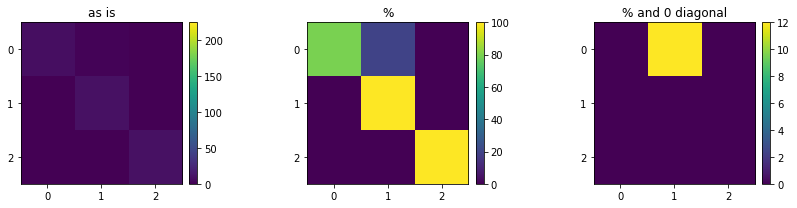

In [34]:
plot_confusion_matrix(cmx, vmax1=225, vmax2=100, vmax3=12)

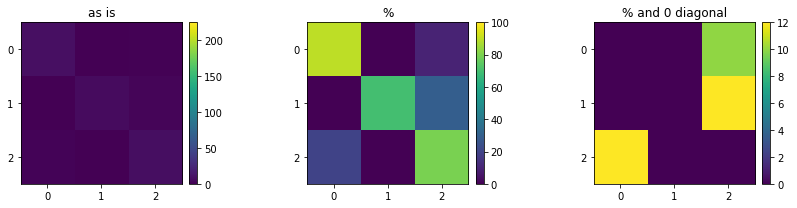

In [35]:
plot_confusion_matrix(cmx_svm, vmax1=225, vmax2=100, vmax3=12)

In [36]:
from sklearn.neural_network import MLPClassifier

mlp_gs = MLPClassifier(max_iter=400, alpha= 0.001, learning_rate='adaptive', solver= 'adam', shuffle=False)

mlp_gs.fit(X_train_prepared, y_train)


MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=400,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=False, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [37]:
X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)


In [38]:
y_pred = mlp_gs.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:30])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))



[ True  True  True  True False  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True False  True  True]

Percentage correct:  86.66666666666667


In [39]:
labels = y_test
predictions = y_pred

# put the data in a dataframe for pretty printing
df = pd.DataFrame(
    np.c_[labels, predictions], 
    columns=['true_label', 'prediction']
)
df

,true_label,prediction
0,Jalan Marka,Jalan Marka
1,Jalan Marka,Jalan Marka
2,Jalan Marka,Jalan Marka
3,Jalan Marka,Jalan Marka
4,Jalan Marka,Jalan Lubang
5,Jalan Marka,Jalan Marka
6,Jalan Marka,Jalan Marka
7,Jalan Marka,Jalan Marka
8,Jalan Marka,Jalan Marka
9,Jalan Marka,Jalan Marka
